In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense,LeakyReLU,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from keras.layers import Dropout,LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers


In [ ]:
d = pd.read_csv('/content/drive/MyDrive/FDS/creditcard.csv')

In [ ]:
data = d.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data[['Amount']])
X = data.drop(['Class'],axis=1)
Y = data.Class


In [ ]:
X.shape

(284807, 29)

In [ ]:
X_array = X.to_numpy()
X_sequences = X_array.reshape((X_array.shape[0], 1, X_array.shape[1]))  # (284807, 1, 29)

In [ ]:
n_features = 29
encoding_dim = 64
batch_size = 256
num_epoch = 30
timesteps = 1


def build_lstm_autoencoder():
    inputs = Input(shape=(timesteps, n_features))
    encoded = LSTM(encoding_dim, activation='relu', return_sequences=False)(inputs)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)

    decoded = RepeatVector(timesteps)(encoded)
    decoded = LSTM(encoding_dim, activation='relu', return_sequences=True)(decoded)
    decoded = TimeDistributed(Dense(n_features))(decoded)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mae','mse'])

    return autoencoder


autoencoder = build_lstm_autoencoder()
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 29)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          24,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 64)               │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 1, 29)               │           1,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,861 (206.49 KB)

 Trainable params: 52,861 (206.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpointer = ModelCheckpoint(filepath="autoencoder_model.h5",
                               verbose=0,
                               save_best_only=True
                               )


In [ ]:
history = autoencoder.fit(X_sequences,
                          X_sequences,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          #validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpointer]
                          ).history


Epoch 1/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4544 - mae: 0.4004 - mse: 0.4544
Epoch 2/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0264 - mae: 0.0914 - mse: 0.0264
Epoch 3/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0110 - mae: 0.0557 - mse: 0.0110
Epoch 4/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0053 - mae: 0.0402 - mse: 0.0053
Epoch 5/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0063 - mae: 0.0405 - mse: 0.0063
Epoch 6/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0030 - mae: 0.0299 - mse: 0.0030
Epoch 7/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - mae: 0.0283 - mse: 0.0029
Epoch 8/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0021 - mae: 0.0250 - mse: 0.0021
Epoch 9/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0025 - mae: 0.0258 - mse: 0.0025
Epoch 10/30
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0019 - mae: 0.0232 - mse: 0.0019
Epoch 11/30
1113/1113 ━━━━━━━

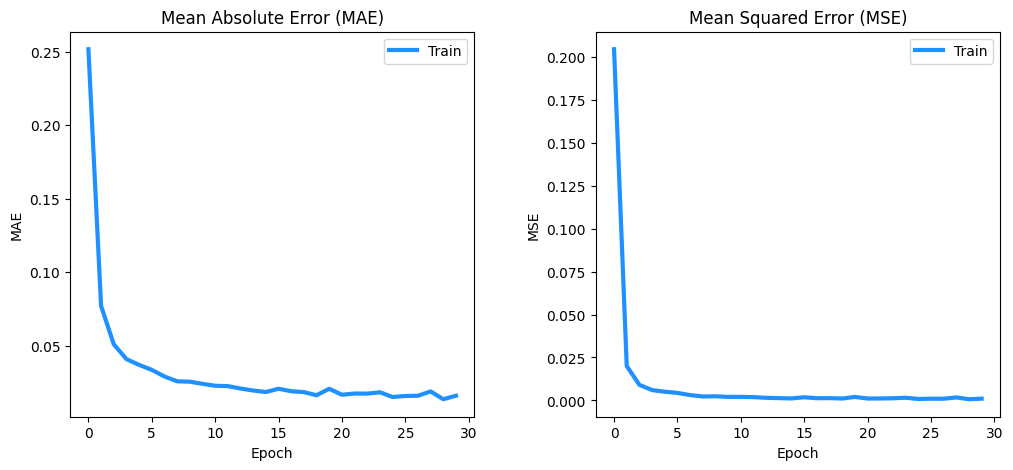

In [ ]:
plt.subplot(121)
plt.plot(history['mae'], c='dodgerblue', lw=3)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

plt.subplot(122)
plt.plot(history['mse'], c='dodgerblue', lw=3)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

plt.subplots_adjust(wspace=0.3)
plt.gcf().set_size_inches(12, 5)

plt.show()


위 코드는 모델 훈련 과정에서의 손실 함수(MSE), 평균 절대 오차(MAE), 평균 제곱 오차(MSE)의 변화를 그래프로 나타내는 작업입니다.

* MAE 그래프: 훈련 과정에서 MAE 값의 변화를 나타냅니다.
* MSE 그래프: 훈련 과정에서 MSE 값의 변화를 나타냅니다.

In [ ]:
pred_X = autoencoder.predict(X_sequences)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [ ]:
pred_X = pred_X.reshape(pred_X.shape[0], pred_X.shape[2])

In [ ]:
mse_X = np.mean(np.power(X - pred_X, 2), axis=1)
mae_X = np.mean(np.abs(X - pred_X), axis=1)
len(mse_X)

284807

In [ ]:
mse_X = np.mean(np.power(X - pred_X, 2), axis=1)
mae_X = np.mean(np.abs(X - pred_X), axis=1)

data['mse_X'] = mse_X
data['mae_X'] = mae_X

n = 1000
df = data.sort_values(by='mae_X', ascending=False)
top_n_df = df.head(n)
accuracy = top_n_df[top_n_df['Class'] == 1].shape[0] / n
print('Top-{} 정확도: {}'.format(n, accuracy))

Top-1000 정확도: 0.397


In [ ]:
from keras.models import load_model
autoencoder.save("/content/drive/MyDrive/FDS/model/lstm_autoencoder.keras")

### 메모리 용량부족

In [ ]:
from keras.models import load_model

# 저장된 모델 불러오기
loaded_model = load_model("/content/drive/MyDrive/FDS/model/lstm_autoencoder.keras")

# 모델 구조 확인
loaded_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 29)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          24,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 64)               │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 1, 29)               │           1,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,724 (412.99 KB)

 Trainable params: 52,861 (206.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,863 (206.50 KB)

In [ ]:
mask = (data['Class'] == 0)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=520)

X_fraud = X[~mask]

X_test = X_test.to_numpy()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_fraud = X_fraud.to_numpy()
X_fraud = X_fraud.reshape((X_fraud.shape[0], 1, X_fraud.shape[1]))

pred_test  = autoencoder.predict(X_test)
pred_fraud = autoencoder.predict(X_fraud)
pred_test = pred_test.reshape(pred_test.shape[0], pred_test.shape[2])
pred_fraud = pred_fraud.reshape(pred_fraud.shape[0], pred_fraud.shape[2])

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
mse_test = np.mean(np.power(X_test - pred_test, 2), axis=1)
mse_fraud = np.mean(np.power(X_fraud - pred_fraud, 2), axis=1)

In [ ]:
mae_test = np.mean(np.abs(X_test - pred_test), axis=1)
mae_fraud = np.mean(np.abs(X_fraud - pred_fraud), axis=1)

In [ ]:
mse_df = pd.DataFrame()
mse_df['Class'] = [0] * len(mse_test) + [1] * len(mse_fraud)
mse_df['MSE'] = np.hstack([mse_test, mse_fraud])
mse_df['MAE'] = np.hstack([mae_test, mae_fraud])
mse_df = mse_df.sample(frac=1).reset_index(drop=True)


# 테스트셋에서 정상 샘플과 부정 행위 샘플의 재구성 오차 MAE와 MSE를 그림으로 표현
markers = ['o', '^']
markers = ['o', '^']
colors = ['dodgerblue', 'red']
labels = ['Non-fraud', 'Fraud']

plt.figure(figsize=(14, 5))
plt.subplot(121)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index,
                temp['MAE'],
                alpha=0.7,
                marker=markers[flag],
                c=colors[flag],
                label=labels[flag])
plt.title('Reconstruction MAE')
plt.ylabel('Reconstruction MAE')
plt.xlabel('Index')

plt.subplot(122)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index,
                temp['MSE'],
                alpha=0.7,
                marker=markers[flag],
                c=colors[flag],
                label=labels[flag])
plt.legend(loc=[1, 0], fontsize=12)
plt.title('Reconstruction MSE')
plt.ylabel('Reconstruction MSE')
plt.xlabel('Index')
plt.show()
